In [1]:
from perceptron import Perceptron
from data_generator import DataGenerator
from typing import List

import numpy as np
import matplotlib.pyplot as plt

In [24]:
def train_loop(N_range: np.ndarray, alpha_range: np.ndarray,
			   nd: int = 200, nmax: int = 100) -> List[float]:

	results = list()

	for N in N_range:
		
		print(f"Doing {N = }")
		
		generator = DataGenerator(N)
		success_runs = np.zeros(len(alpha_range))

		for i, alpha in enumerate(alpha_range):
			P = int(alpha * N)

			success_sum = 0
			for _ in range(nd):
				perceptron = Perceptron(N)
				X, Y = generator.generate(P)
				if perceptron.train(X, Y, nmax):
					success_sum += 1

			success_runs[i] = float(success_sum) / float(nd)
		
		results.append(success_runs)

	return results

In [25]:
alpha_range1 = np.arange(0.75, 3.01, 0.25)
N_range1 = np.array([20, 40])

results1 = train_loop(N_range1, alpha_range1)

Doing N = 20
Doing N = 40


In [26]:
alpha_range2 = np.arange(1.5, 2.51, 0.05)
N_range2 = np.arange(20, 101, 20)

results2 = train_loop(N_range2, alpha_range2)

Doing N = 20
Doing N = 40
Doing N = 60
Doing N = 80
Doing N = 100


In [40]:
def plot_results(alpha_range: np.ndarray, N_range: np.ndarray, results: List[float]) -> None:

	fig, plots = plt.subplots(1, len(results), figsize=(len(results) * 4, 3))
	for i, plot in enumerate(plots):
		plot.plot(alpha_range, results[i])
		plot.set_title(f"N = {N_range[i]}")

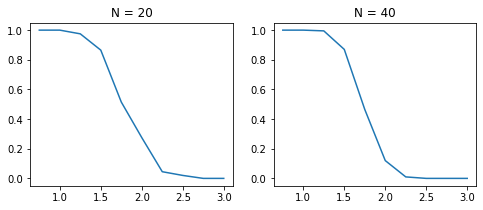

In [41]:
plot_results(alpha_range1, N_range1, results1)

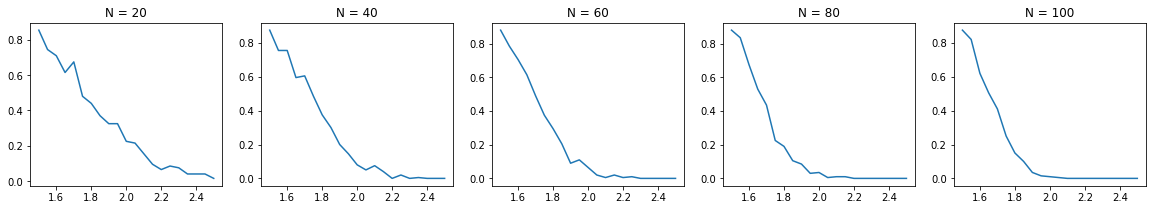

In [42]:
plot_results(alpha_range2, N_range2, results2)